# 📝 Section 1: Mastering Pandas & NumPy

In [96]:
# Install necessary Libraries
%pip install pandas numpy scipy statsmodels matplotlib seaborn ta-lib backtrader --quiet


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [97]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [98]:
# Initialize variables
stock1 = 'AAPL'
stock2 = 'MSFT'
start_date = '2020-01-01'
end_date = '2024-01-01'

### TASK 1: Download stock data


In [99]:
stock1_data = yf.download(stock1, start=start_date, end=end_date)
stock2_data = yf.download(stock2, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [100]:
# Display the data
stock2_data.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,153.323288,153.428291,151.137325,151.566880,22622100
2020-01-03,151.414093,152.683675,150.879535,151.127733,21116200
2020-01-06,151.805466,151.872293,149.399942,149.944055,20813700
2020-01-07,150.421356,152.416407,150.173173,152.082316,21634100
2020-01-08,152.817383,153.495135,150.774600,151.710076,27746500


In [101]:
# Get information about the DataFrame
stock2_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,256.127667,258.783849,253.227590,256.018010,3.065417e+07
std,55.230322,55.366148,55.001108,55.256412,1.299798e+07
min,129.621170,134.550627,126.845335,131.143058,9.200800e+06
25%,214.462273,215.925738,210.884884,214.334225,2.249522e+07
50%,252.848373,255.360117,249.244096,252.351452,2.727275e+07
75%,296.010803,299.924434,292.686642,295.782911,3.462020e+07
max,379.099335,380.684258,374.602041,380.149360,9.701270e+07


### TASK 2: Calculate the daily returns of the stocks and cumulative returns


In [102]:
stock1_data['Daily Return'] = stock1_data['Close'].pct_change()
stock2_data['Daily Return'] = stock2_data['Close'].pct_change()

stock1_data['Cumulative Return'] = (1 + stock1_data['Daily Return']).cumprod()
stock2_data['Cumulative Return'] = (1 + stock2_data['Daily Return']).cumprod()

# TASK 3: Calculate the Rolling Mean, Rolling Standard Deviation and bollinger bands

**WHAT IS A MOVING AVERAGE?**   
A moving average is a widely used indicator in technical analysis that helps smooth out past price data 
to create a trend-following indicator. It is a lagging indicator because it is based on past prices.

**WHAT IS A STANDARD DEVIATION?**   
Standard deviation is a measure of the dispersion of a set of data from its mean.
It is calculated as the square root of variance by determining each data point's deviation relative to the mean.

**WHAT IS A BOLLINGER BAND?**   
A Bollinger Band is a technical analysis tool defined by a set of lines plotted two standard deviations (positively and negatively)
away from a simple moving average (SMA) of a security's price, but which can be adjusted to user preferences.


In [103]:
window = 10
bollinger_band_factor = 2

stock1_data['Rolling Mean'] = stock1_data['Close'].rolling(window=window).mean()
stock1_data['Rolling Std'] = stock1_data['Close'].rolling(window=window).std()

stock2_data['Rolling Mean'] = stock2_data['Close'].rolling(window=window).mean()
stock2_data['Rolling Std'] = stock2_data['Close'].rolling(window=window).std()

stock1_data['Upper Band'] = stock1_data['Rolling Mean'] + (stock1_data['Rolling Std'] * bollinger_band_factor)
stock1_data['Lower Band'] = stock1_data['Rolling Mean'] - (stock1_data['Rolling Std'] * bollinger_band_factor)

stock2_data['Upper Band'] = stock2_data['Rolling Mean'] + (stock2_data['Rolling Std'] * bollinger_band_factor)
stock2_data['Lower Band'] = stock2_data['Rolling Mean'] - (stock2_data['Rolling Std'] * bollinger_band_factor)

stock1_data.head()


Price,Close,High,Low,Open,Volume,Daily Return,Cumulative Return,Rolling Mean,Rolling Std,Upper Band,Lower Band
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2020-01-02,72.716057,72.776583,71.466797,71.721004,135480400,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800,-0.009722,0.990278,NaN,NaN,NaN,NaN
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,0.007968,0.998169,NaN,NaN,NaN,NaN
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000,-0.004703,0.993475,NaN,NaN,NaN,NaN
2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200,0.016086,1.009456,NaN,NaN,NaN,NaN


### TASK 4: Handle missing values

In [104]:
stock1_data.dropna(inplace=True)
stock2_data.fillna(inplace=True, value=0)
stock1_data.head()

Price,Close,High,Low,Open,Volume,Daily Return,Cumulative Return,Rolling Mean,Rolling Std,Upper Band,Lower Band
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2020-01-15,75.376801,76.383956,74.943431,75.500276,121923600,-0.004286,1.036591,74.086385,1.682776,77.451937,70.720832
2020-01-16,76.321007,76.432380,75.558379,75.921536,108829200,0.012526,1.049576,74.446880,1.741704,77.930288,70.963471
2020-01-17,77.165955,77.168371,76.262902,76.570372,137816400,0.011071,1.061196,74.962562,1.702719,78.368000,71.557123
2020-01-21,76.643013,77.236165,76.505012,76.793117,110843200,-0.006777,1.054004,75.368571,1.549410,78.467391,72.269752
2020-01-22,76.916603,77.471017,76.822179,77.129649,101832400,0.003570,1.057766,75.836076,1.156556,78.149188,73.522964


Text(0.5, 1.0, 'AAPL Data')

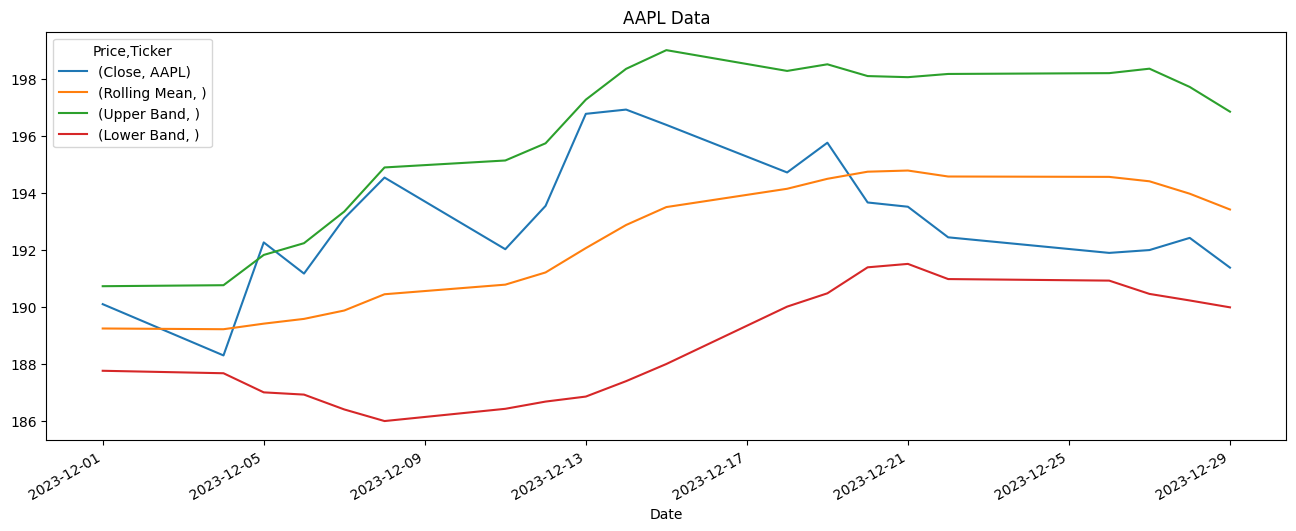

In [105]:
# Plot the data
stock1_data[['Close', 'Rolling Mean', 'Upper Band', 'Lower Band']].tail(20).plot(figsize=(16, 6))
plt.title(f'{stock1} Data')

# TASK 5: Calculate correlations between the stocks

**WHAT IS CORRELATION?**   
Correlation is a statistical measure that expresses the extent to which two variables are linearly related 
(meaning they change together at a constant rate). 
It’s a common tool for describing simple relationships without making a statement about cause and effect.


In [106]:

correlation = stock1_data['Daily Return'].corr(stock2_data['Daily Return'])
print(f'The correlation between {stock1} and {stock2} is {correlation}')

The correlation between AAPL and MSFT is 0.776747294586679


### TASK 6: DateTime Indexing


In [107]:
stock1_data.index = pd.to_datetime(stock1_data.index)
stock2_data.index = pd.to_datetime(stock2_data.index)

stock1_data.head()

Price,Close,High,Low,Open,Volume,Daily Return,Cumulative Return,Rolling Mean,Rolling Std,Upper Band,Lower Band
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2020-01-15,75.376801,76.383956,74.943431,75.500276,121923600,-0.004286,1.036591,74.086385,1.682776,77.451937,70.720832
2020-01-16,76.321007,76.432380,75.558379,75.921536,108829200,0.012526,1.049576,74.446880,1.741704,77.930288,70.963471
2020-01-17,77.165955,77.168371,76.262902,76.570372,137816400,0.011071,1.061196,74.962562,1.702719,78.368000,71.557123
2020-01-21,76.643013,77.236165,76.505012,76.793117,110843200,-0.006777,1.054004,75.368571,1.549410,78.467391,72.269752
2020-01-22,76.916603,77.471017,76.822179,77.129649,101832400,0.003570,1.057766,75.836076,1.156556,78.149188,73.522964


### TASK 7: Resample the data


In [108]:
stock1_monthly_data = stock1_data.resample('ME').mean() # ME stands for Month End + uses mean to aggregate the data
stock1_monthly_data.head()

Price,Close,High,Low,Open,Volume,Daily Return,Cumulative Return,Rolling Mean,Rolling Std,Upper Band,Lower Band
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2020-01-31,76.696267,77.405429,76.033101,76.751749,1.415824e+08,-0.000661,1.054736,75.895893,1.205770,78.307434,73.484353
2020-02-29,75.500291,76.466395,74.398085,75.268342,1.589094e+08,-0.006109,1.038289,76.970719,1.882788,80.736296,73.205143
2020-03-31,63.689675,65.448766,61.845865,63.357095,2.854578e+08,-0.001261,0.875868,65.777011,3.703206,73.183424,58.370599
2020-04-30,66.102415,66.926368,65.058434,65.962932,1.554904e+08,0.007339,0.909048,64.312761,2.369577,69.051915,59.573608
2020-05-31,75.381868,76.176013,74.505311,75.114526,1.402968e+08,0.004162,1.036661,73.462242,1.660082,76.782405,70.142079


### TASK 8: Advanced Indexing

In [109]:
stock1_data.loc['2020-01-01':'2020-12-31', ['Close', 'Daily Return']].head()

Price,Close,Daily Return
Ticker,AAPL,
Date,,
2020-01-15,75.376801,-0.004286
2020-01-16,76.321007,0.012526
2020-01-17,77.165955,0.011071
2020-01-21,76.643013,-0.006777
2020-01-22,76.916603,0.003570


### TASK 9: Cumsum and Cumprod


Text(0.5, 1.0, 'AAPL Cumulative Return and Cumulative Sum')

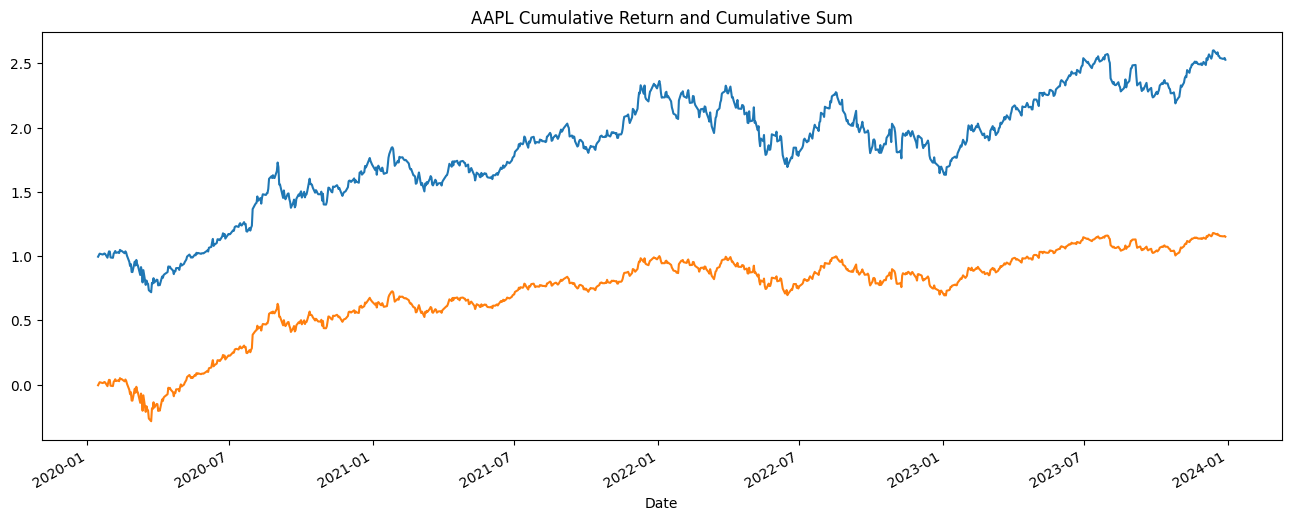

In [110]:
stock1_data['Cumulative Return'] = (1 + stock1_data['Daily Return']).cumprod()
stock1_data['Cumulative Sum'] = stock1_data['Daily Return'].cumsum()

plt.figure(figsize=(16, 6))
stock1_data['Cumulative Return'].plot()
stock1_data['Cumulative Sum'].plot()
plt.title(f'{stock1} Cumulative Return and Cumulative Sum')

### TASK 10: Vectorized Operations: sharpe ratio, drawdowns, and maximum drawdown

**WHAT IS THE SHARPE RATIO?**   
The Sharpe ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations.
It was developed by Nobel laureate William F. Sharpe. 
The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.


Text(0.5, 1.0, 'AAPL Sharpe Ratio')

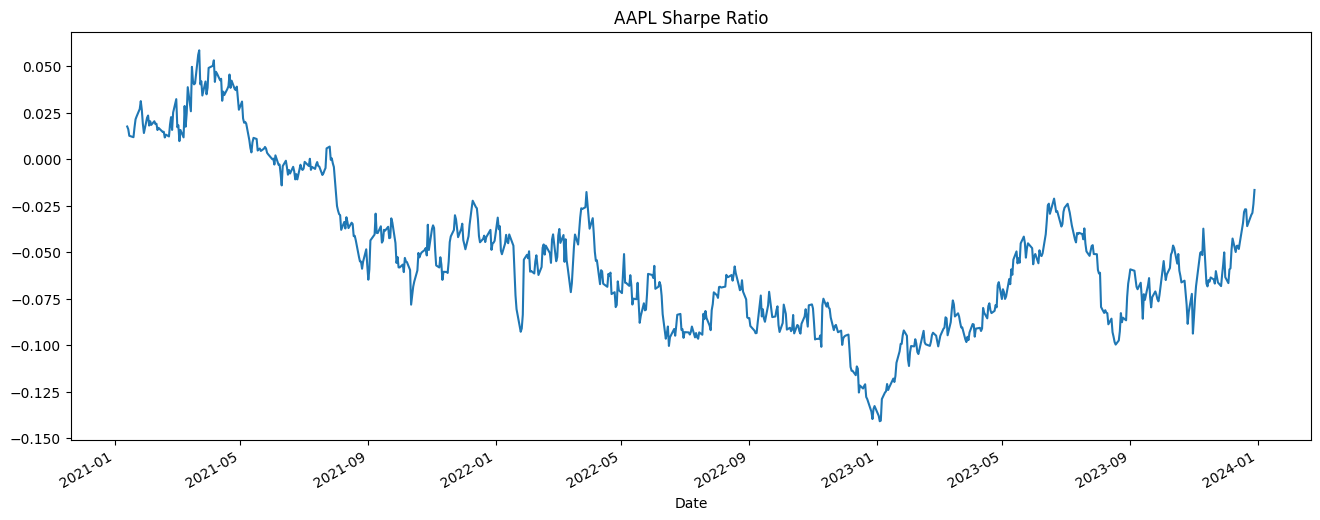

In [111]:
def rolling_sharpe_ratio(returns, window=252, risk_free_rate=0.002):
    return (returns.rolling(window=window).mean() - risk_free_rate) / returns.rolling(window=window).std()

stock1_data['Sharpe Ratio'] = rolling_sharpe_ratio(stock1_data['Daily Return'])
stock1_data['Sharpe Ratio'].plot(figsize=(16, 6))
plt.title(f'{stock1} Sharpe Ratio')

### TASK 12: Drawdowns and Maximum Drawdown


AAPL's max drawdown has been: -31.43%


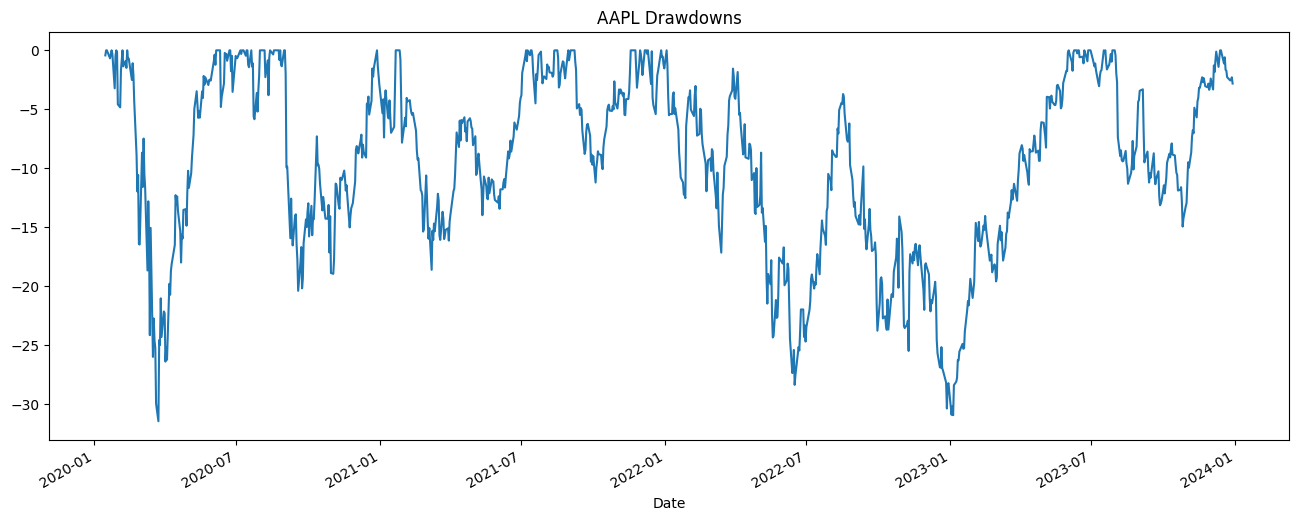

In [118]:
def drawdowns(returns):
    cum_returns = (1 + returns).cumprod()

    # The key reason for keeping track of the running_max is to calculate drawdowns, which represent the decline from a previous peak.
    #  In this drawdown calculation, we're interested in how far the cumulative returns have fallen relative to the highest point (the "peak") 
    # reached up to that point in time.

    running_max = np.maximum.accumulate(cum_returns)
    running_max[running_max < 1] = 1
    drawdowns = ((cum_returns) / running_max - 1) * 100
    return drawdowns

def max_drawdown(returns):
    return drawdowns(returns).min() 

stock1_data['Drawdowns'] = drawdowns(stock1_data['Daily Return'])

stock1_data['Drawdowns'].plot(figsize=(16, 6))
plt.title(f'{stock1} Drawdowns')

print(f"{stock1}'s max drawdown has been: " + str(round(max_drawdown(stock1_data['Daily Return']), 2)) + "%")